# Impact of Temperature on Flooding (River Discharge)
**Hypotheses**

1. Hotter weather may not have a significant impact on flooding events:
   - While warmer temperatures may increase evaporation rates, leading to higher moisture content in the atmosphere, other factors like precipitation patterns, geographical features, and local drainage systems may play a more dominant role in determining the occurrence and severity of flooding events.

**Data Sources**

1. Open Meteo Flood API (GloFAS) 1990-2020:
   - This dataset contains historical flood data, including information on flood severity, frequency, and location. It will be used to analyze the relationship between flooding events and other potential influencing factors.

2. Open Meteo Weather API:
   - This API provides historical weather data, including maximum and minimum daily temperatures, precipitation, and other relevant weather variables. It will be used to study weather patterns and their association with flooding events.

**Visualization**

1. Time Series:
   - Time series plots will be used to visualize the trend of flooding events over the years. This will help identify any patterns or seasonal variations in flooding occurrences.

2. Data Comparison:
   - Visual comparisons between temperature data and flooding occurrences will be made to observe any potential trends or correlations. Scatter plots or other data visualization techniques will be employed.

Through these analyses, we aim to explore the relationship between temperature and flooding events. By considering other influencing factors, we can gain a comprehensive understanding of the drivers of flooding and their potential interactions with climate variables. This information is vital for better flood risk assessment, climate change impact studies, and devising effective strategies to manage and mitigate the impacts of flooding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

file_path = 'Data/brisbane_climate.csv'
climate_df = pd.read_csv(file_path)
climate_df

,time,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm)
0,1/1/1990,22.5,26.6,16.9,0.2
1,2/1/1990,23.2,28.7,18.2,0.2
2,3/1/1990,22.9,29.5,15.9,0.2
3,4/1/1990,23.8,29.2,17.5,0.1
4,5/1/1990,24.4,30.1,18.8,0.0
...,...,...,...,...,...
11318,27/12/2020,25.1,31.7,20.8,0.3
11319,28/12/2020,22.6,27.7,20.6,6.9
11320,29/12/2020,24.0,30.6,22.3,40.2
11321,30/12/2020,22.1,23.5,21.2,23.5


In [2]:

# Convert the "time" column to datetime format
climate_df['time'] = pd.to_datetime(climate_df['time'], dayfirst=True)

climate_df['year'] = climate_df['time'].dt.year

# Group the data by year and calculate the mean, median, standard deviation,
# maximum, and minimum temperature for each year
temperature_stats_by_year = climate_df.groupby('year')['temperature_2m_mean (°C)'].agg(['mean', 'median', 'std', 'max', 'min'])

# Print the statistics by year
temperature_stats_by_year


,mean,median,std,max,min
year,,,,,
1990,18.593425,19.40,4.773687,31.6,7.7
1991,18.980274,19.20,3.896765,27.1,8.9
1992,18.115027,18.50,4.663683,29.1,6.7
1993,17.892877,18.50,4.804857,27.7,8.0
1994,18.781096,18.50,4.570347,32.4,8.8
1995,18.262192,18.80,3.982247,27.1,7.6
1996,18.281967,17.95,4.727570,27.8,8.1
1997,19.751781,20.60,4.464146,30.8,9.5
1998,18.396438,19.00,3.836581,26.3,8.5


In [3]:
file_path1 = 'data/brisbane_flood.csv'
flood_df = pd.read_csv(file_path1)
flood_df

,time,river_discharge (m³/s)
0,1/1/1990,33.20
1,2/1/1990,31.58
2,3/1/1990,30.41
3,4/1/1990,29.48
4,5/1/1990,28.85
...,...,...
11318,27/12/2020,44.08
11319,28/12/2020,38.26
11320,29/12/2020,36.84
11321,30/12/2020,35.64


In [4]:
# Convert the "time" column to datetime format
flood_df['time'] = pd.to_datetime(flood_df['time'], dayfirst=True)

flood_df['year'] = flood_df['time'].dt.year

# Group the data by year and calculate the mean, median, standard deviation,
# minimum, and maximum river discharge for each year
flood_by_year = flood_df.groupby('year')['river_discharge (m³/s)'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the statistics by year
flood_by_year


,mean,median,std,min,max
year,,,,,
1990,81.905781,45.130,89.844691,25.49,563.94
1991,46.754247,25.670,71.777265,13.39,733.51
1992,61.711694,36.670,73.712401,14.14,575.77
1993,18.153699,11.710,19.234452,2.97,132.35
1994,23.124219,15.750,27.133800,1.03,158.59
1995,45.298000,24.760,75.410655,3.00,635.80
1996,97.274699,45.395,165.203456,26.80,1360.44
1997,29.770795,26.100,22.267261,4.85,189.99
1998,52.800712,38.170,48.411262,8.51,270.02


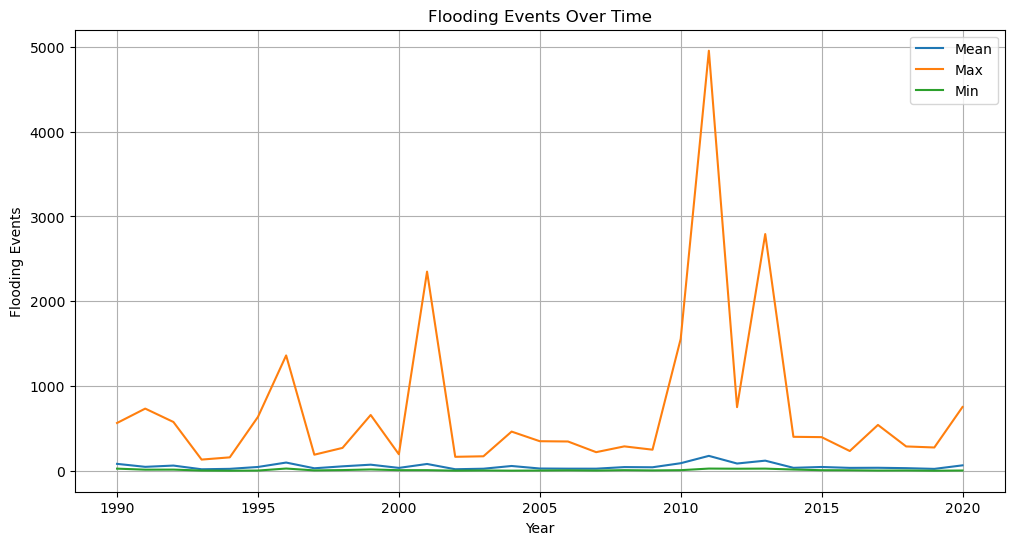

In [5]:
# Plot the flooding events over time
plt.figure(figsize=(12, 6))
plt.plot(flood_by_year.index, flood_by_year['mean'], label='Mean')
plt.plot(flood_by_year.index, flood_by_year['max'], label='Max')
plt.plot(flood_by_year.index, flood_by_year['min'], label='Min')
plt.title('Flooding Events Over Time')
plt.xlabel('Year')
plt.ylabel('Flooding Events')
plt.legend()
plt.grid(True)
plt.show()





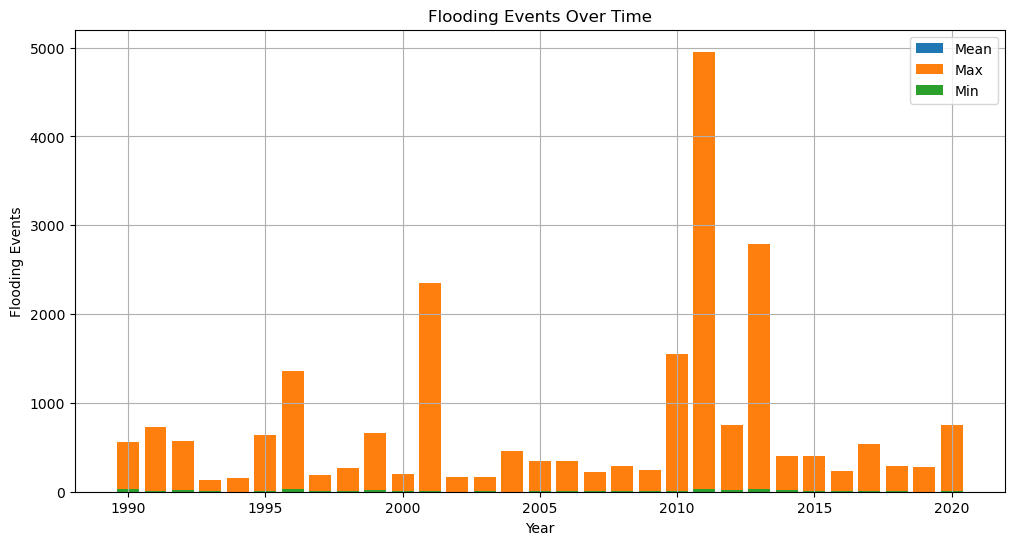

In [6]:
# Plot the flooding events over time using bar chart
plt.figure(figsize=(12, 6))
plt.bar(flood_by_year.index, flood_by_year['mean'], label='Mean')
plt.bar(flood_by_year.index, flood_by_year['max'], label='Max')
plt.bar(flood_by_year.index, flood_by_year['min'], label='Min')
plt.title('Flooding Events Over Time')
plt.xlabel('Year')
plt.ylabel('Flooding Events')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Calculate Spearman's rank correlation coefficient
spearman_correlation = temperature_stats_by_year['mean'].corr(flood_by_year['mean'], method='spearman')

print("Spearman's Rank Correlation Coefficient:", spearman_correlation)


Spearman's Rank Correlation Coefficient: -0.29475806451612907


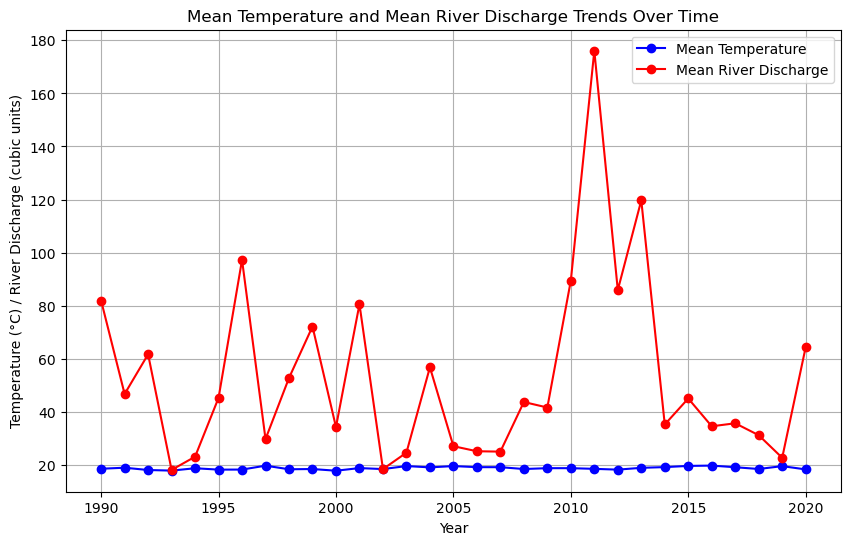

In [8]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean temperature and mean river discharge
ax.plot(temperature_stats_by_year.index, temperature_stats_by_year['mean'], label='Mean Temperature', marker='o', color='blue')
ax.plot(flood_by_year.index, flood_by_year['mean'], label='Mean River Discharge', marker='o', color='red')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C) / River Discharge (cubic units)')
ax.set_title('Mean Temperature and Mean River Discharge Trends Over Time')

# Show legend
ax.legend()

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()




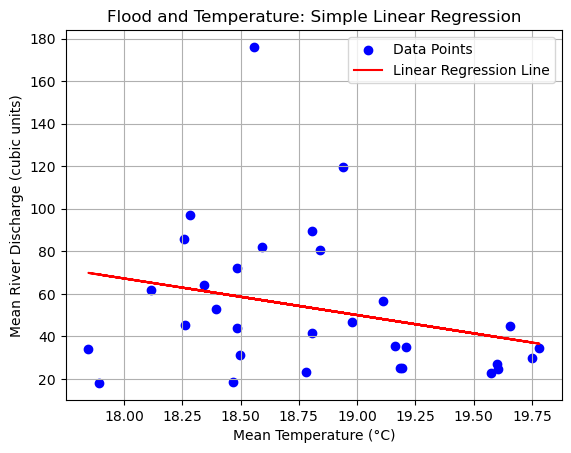

Equation of the line: Flood = 376.96 + -17.21 * Temperature


In [9]:
from sklearn.linear_model import LinearRegression

temperature = temperature_stats_by_year['mean'].values.reshape(-1, 1)
flood = flood_by_year['mean'].values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model using the sample data
model.fit(temperature, flood)

# Get the intercept and slope of the linear regression line
intercept = model.intercept_[0]
slope = model.coef_[0][0]

# Predict flood values using the model
flood_pred = model.predict(temperature)

# Plot the data points and the linear regression line
plt.scatter(temperature, flood, color='blue', label='Data Points')
plt.plot(temperature, flood_pred, color='red', label='Linear Regression Line')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Mean River Discharge (cubic units)')
plt.title('Flood and Temperature: Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the equation of the linear regression line
print(f"Equation of the line: Flood = {intercept:.2f} + {slope:.2f} * Temperature")


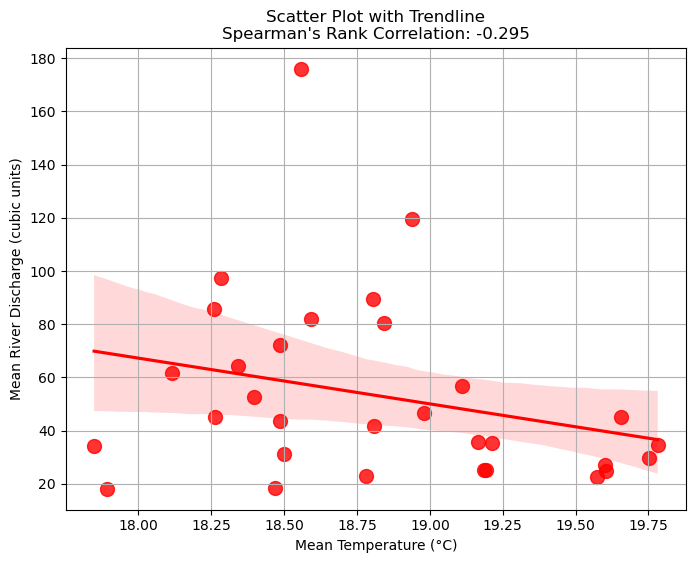

In [10]:

# Calculate Spearman's rank correlation coefficient
spearman_correlation = temperature_stats_by_year['mean'].corr(flood_by_year['mean'], method='spearman')

# Create the scatter plot with a trendline
plt.figure(figsize=(8, 6))
sns.regplot(x=temperature_stats_by_year['mean'], y=flood_by_year['mean'], scatter_kws={'s': 100}, color='red')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Mean River Discharge (cubic units)')
plt.title(f'Scatter Plot with Trendline\nSpearman\'s Rank Correlation: {spearman_correlation:.3f}')
plt.grid(True)
plt.show()


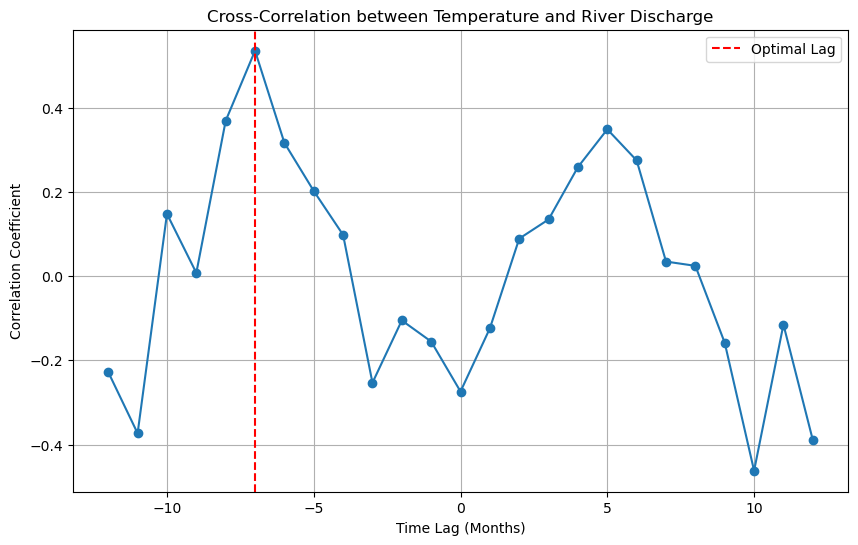

Optimal Time Lag: -7 months


In [11]:

# Calculate cross-correlation between temperature and river discharge with different time lags
max_lag = 12  # Define the maximum time lag (e.g., 12 months)
lags = np.arange(-max_lag, max_lag + 1)
correlations = [temperature_stats_by_year['mean'].corr(flood_by_year['mean'].shift(lag)) for lag in lags]

# Find the time lag with the highest correlation
optimal_lag = lags[np.argmax(correlations)]

# Plot cross-correlation results
plt.figure(figsize=(10, 6))
plt.plot(lags, correlations, marker='o')
plt.axvline(x=optimal_lag, color='red', linestyle='--', label='Optimal Lag')
plt.xlabel('Time Lag (Months)')
plt.ylabel('Correlation Coefficient')
plt.title('Cross-Correlation between Temperature and River Discharge')
plt.legend()
plt.grid(True)
plt.show()

print(f'Optimal Time Lag: {optimal_lag} months')
